In [192]:
%cd C:\Users\yukir\Documents\GitHub\Text_Mining\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Dental\LDA

C:\Users\yukir\Documents\GitHub\Text_Mining\py
C:\Users\yukir\Documents\Monicas_workspace\Dental\LDA


In [193]:
final_review = pd.read_csv("final_dental_neg.csv", index_col = 0)
final_review.head(2)

,hospital,reviews,stars,address,add_clean,cleaned_reviews,detokenized_doc,dominant_topic
32,잎사귀치과병원,사랑니 발치 위아래 5분정도 걸린 거 같아요 빨리 뽑은 건 만족합니다 그러나 자세한...,5.8,서울 서대문구 신촌동,서울,사랑니 발치 위아래 5분정도 걸린 거 같아요 빨리 뽑은 건 만족합니다 그러나 자세한...,사랑니 발치 위아래 설명 직원 친절 개선 소독 두번째 방문 설명 전혀 소독 진료 바...,1
36,잎사귀치과병원,매복이 아닌 사랑니 2개 발치했습니다. 사랑니는 너무 깔끔하게 잘 발치해서 겸사겸사...,6.5,서울 서대문구 신촌동,서울,매복이 아닌 사랑니 2개 발치했습니다 사랑니는 너무 깔끔하게 잘 발치해서 겸사겸사...,매복 사랑니 발치 사랑니 발치 겸사겸사 충치 검진 기선 과잉 진료 사랑니 과잉 진료 기분,1


Text(0.5, 1.0, '안녕')

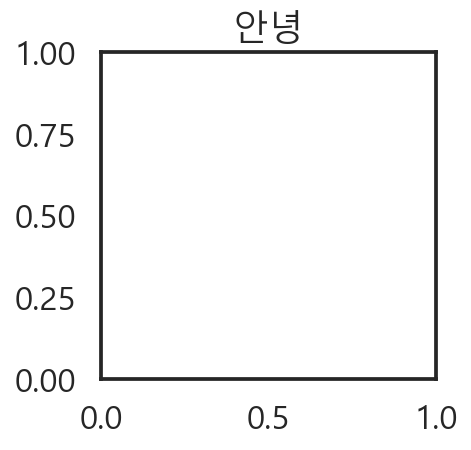

In [194]:
plt.figure(figsize = (3,3))
plt.rc('font', family='Malgun Gothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [195]:
df = final_review.copy()
print(df.shape)

(2763, 8)


In [196]:
df.add_clean.value_counts()

서울      1978
경기도      324
부산       105
인천        89
대구        49
경상남도      39
대전        34
광주        33
경상북도      23
충청남도      20
울산        18
강원도       17
전라북도      13
충청북도      12
전라남도       4
제주         3
세종         2
Name: add_clean, dtype: int64

In [197]:
df = df.dropna(axis=0)
print(df.shape)

(2763, 8)


In [198]:
seoul= df[df['add_clean'] == '경기도']
df_less6 = seoul[seoul['stars'] <=6.0]
print(df_less6.shape)
df_less6.head()

(186, 8)


,hospital,reviews,stars,address,add_clean,cleaned_reviews,detokenized_doc,dominant_topic
4597,사과나무치과병원,처음에 10월 첫째주 월요일로 예약했는데 금요일인가 토요일에 연락와서 갑자기 월요일...,6.0,경기도 부천시 심곡동,경기도,처음에 10월 첫째주 월요일로 예약했는데 금요일인가 토요일에 연락와서 갑자기 월요일...,처음 월요일 예약 금요일 토요일 연락 갑자기 월요일 검진 토요일 발치 토요일 상담 ...,0
8301,KDI치과의원,금니한지얼마안되서 또빠짐여기서 때우고 얼마지나지않아 타병원에서다시 때웠어요금니하나...,1.8,경기도 수원시 권선구 권선1동,경기도,금니한지얼마안되서 또빠짐여기서 때우고 얼마지나지않아 타병원에서다시 때웠어요금니하나...,얼마 여기 얼마 병원 다시 요금 하나 주차,2
8498,서울샤플란트치과의원,상담직원이 치료후 중요한 설명을 누락하여 치료시기를 놓치고 결국 치아를 살리지 못하...,1.0,경기도 수원시 권선구 권선1동,경기도,상담직원이 치료후 중요한 설명을 누락하여 치료시기를 놓치고 결국 치아를 살리지 못하...,상담 직원 치료 설명 누락 치료 시기 치아 병원 임플란트 데스크 직원 환자 상태 대...,0
10198,신영통연세치과의원,평이 워낙 좋아(과잉진료 없다는점) 멀리 있지만 찾아가보았습니다검진후 간단한 약만 ...,5.5,경기도 수원시 영통구 망포1동,경기도,평이 워낙 좋아과잉진료 없다는점 멀리 있지만 찾아가보았습니다검진후 간단한 약만 바르...,평이 워낙 과잉 진료 멀리 검진 수준 코팅 시림 현상 병원 처음 치료 병원 가지 코...,2
10941,분당후즈후치과의원,매복 사랑니 관련해서 상담 받으러 감. 결론은 X레이 찍고 끝.대형 수술을 해야하는...,5.5,경기도 성남시 분당구 수내1동,경기도,매복 사랑니 관련해서 상담 받으러 감 결론은 X레이 찍고 끝 대형 수술을 해야하는...,매복 사랑니 관련 상담 결론 레이 대형 수술 협박 보호자 동행 다시 예약 교정 전문...,1


In [199]:
from konlpy.tag import Okt
okt = Okt()

In [200]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [201]:
def stemming(x):
    import re
    malist5 = okt.pos(x, norm=False, stem=True)
    comment = ''
    last = ''
    for pos in malist5:
        if pos[1] in ['Verb', 'Punctuation', 'adverb']:
            comment = comment + pos[0] + ' '
        elif last == pos[1]:
            comment = comment + ' ' + pos[0]
        elif pos[1] == 'Josa':
            comment = comment + pos[0] + ' '
        else:
            comment = comment + pos[0]
            last = pos[1]
        
    return comment

In [202]:
df_less6['reviews'] = df_less6['reviews'].apply(make_noun)
df_less6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_16400/102175525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less6['reviews'] = df_less6['reviews'].apply(make_noun)


4597     [처음, 주, 월요일, 예약, 금요일, 토요일, 연락, 갑자기, 월요일, 왜, 제,...
8301     [금, 얼마, 또, 여기, 얼마, 병원, 다시, 요금, 하나, 십, 돈, 무, 나,...
8498     [상담, 직원, 치료, 후, 설명, 누락, 치료, 시기, 치아, 못, 병원, 임플란...
10198    [평이, 워낙, 과잉, 진료, 점, 멀리, 검진, 후, 약, 수준, 코팅, 액, 시...
10941    [매복, 사랑니, 관련, 상담, 감, 결론, 레이, 끝, 대형, 수술, 것, 겁, ...
Name: reviews, dtype: object

In [203]:
df_less6['reviews'] = [" ".join(review) for review in df_less6['reviews'].values]
df_less6['reviews']

C:\Users\yukir\AppData\Local\Temp/ipykernel_16400/6064538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less6['reviews'] = [" ".join(review) for review in df_less6['reviews'].values]


4597     처음 주 월요일 예약 금요일 토요일 연락 갑자기 월요일 왜 제 말 검진 토요일 발치...
8301                   금 얼마 또 여기 얼마 병원 다시 요금 하나 십 돈 무 나 주차
8498     상담 직원 치료 후 설명 누락 치료 시기 치아 못 병원 임플란트 데스크 직원 환자 ...
10198    평이 워낙 과잉 진료 점 멀리 검진 후 약 수준 코팅 액 시림 현상 병원 처음 치료...
10941    매복 사랑니 관련 상담 감 결론 레이 끝 대형 수술 것 겁 협박 거 보호자 동행 날...
                               ...                        
76151    줄평 치과 발품 의사 쌤 설명 주시 편 대답 과잉 진료 설명 대답 끝 자꾸 추가 하...
90238    오른쪽 윗 어금니 충치 때문 방문 치아 엑스레이 치료 답변 문제 다른 치아 개 얘기...
93983                    음 직원 명 진료 대기 시간 위생 상태 유의 의사 선생님 것
94023    스케일링 치위생사 치과 좀 한번 별로 다음 치료 관 설명 수납 때 데스크 다음 뭐 ...
94031        직원 가족 방문 과잉 진료 거 다만 병원 거 느낌 의사 선생님 연세 좀 경력 전체
Name: reviews, Length: 186, dtype: object

In [204]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = stopwords_kor, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=2000, min_df=2, ngram_range=(1, 6),
                stop_words=['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희',
                            '따라', '의해', '을', '를', '에', '의', '가', '으로', '로',
                            '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면',
                            '예를 들면', '예를 들자면', '저', '소인', '소생', ...])

In [206]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_less6['reviews'])
feature_vector.shape

(186, 783)

In [207]:
vocab = vectorizer.get_feature_names()
print(len(vocab))


783


In [208]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 783)


In [209]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
병원,13.328029
치료,12.366658
진료,12.001856
치과,10.931016
방문,9.290903
...,...
설명 치료,1.480255
병원 치료,1.477661
체크,1.465086
매복,1.453885


In [210]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
778,환자 입장,0.553811
779,환자 진료,0.348762
780,환자 치료,0.568154
781,회사,0.443944
782,후기,0.779020


In [211]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(783, 2)
(783, 2)


In [212]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
216,병원,13.328029
683,치료,12.366658
593,진료,12.001856
661,치과,10.931016
195,방문,9.290903
481,의사,9.161219
314,선생님,8.931851
329,설명,8.787842
60,교정,7.299859
574,직원,7.260095


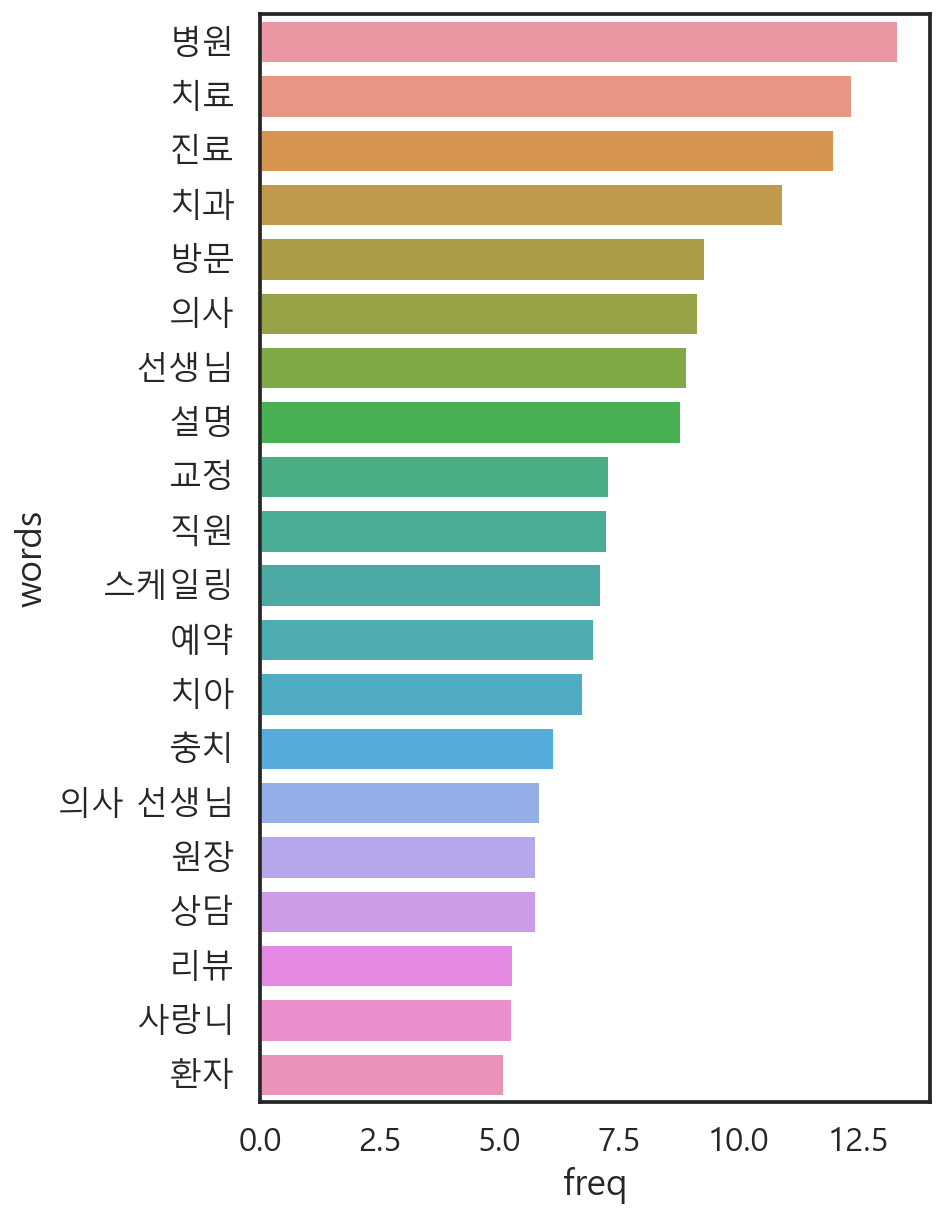

In [213]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,10))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [263]:
words_v2 = []

for num, i in enumerate (df_use.words):
  try:
    if '화이트' in i:
      pass
    elif '하니' in i:
      pass
    elif '줄평' in i:
      pass
    elif '군데' in i:
      pass
    else :
      words_v2.append((i, int(df_use.freq[num])))
  except: 
    pass
    
    # words_v2.append((i, int(df_use.freq[num])))
  # words_v2.append((i, int(df_use.freq[num])))

words_v2[:5]

[('병원', 0), ('치료', 4), ('진료', 0), ('치과', 0), ('방문', 0)]

In [264]:
for i in words_v2:
    if i[0]=='하니':
        print(i)

In [265]:
words_clean = words_v2.copy()

## **NETWORK**

In [266]:
from apyori import apriori

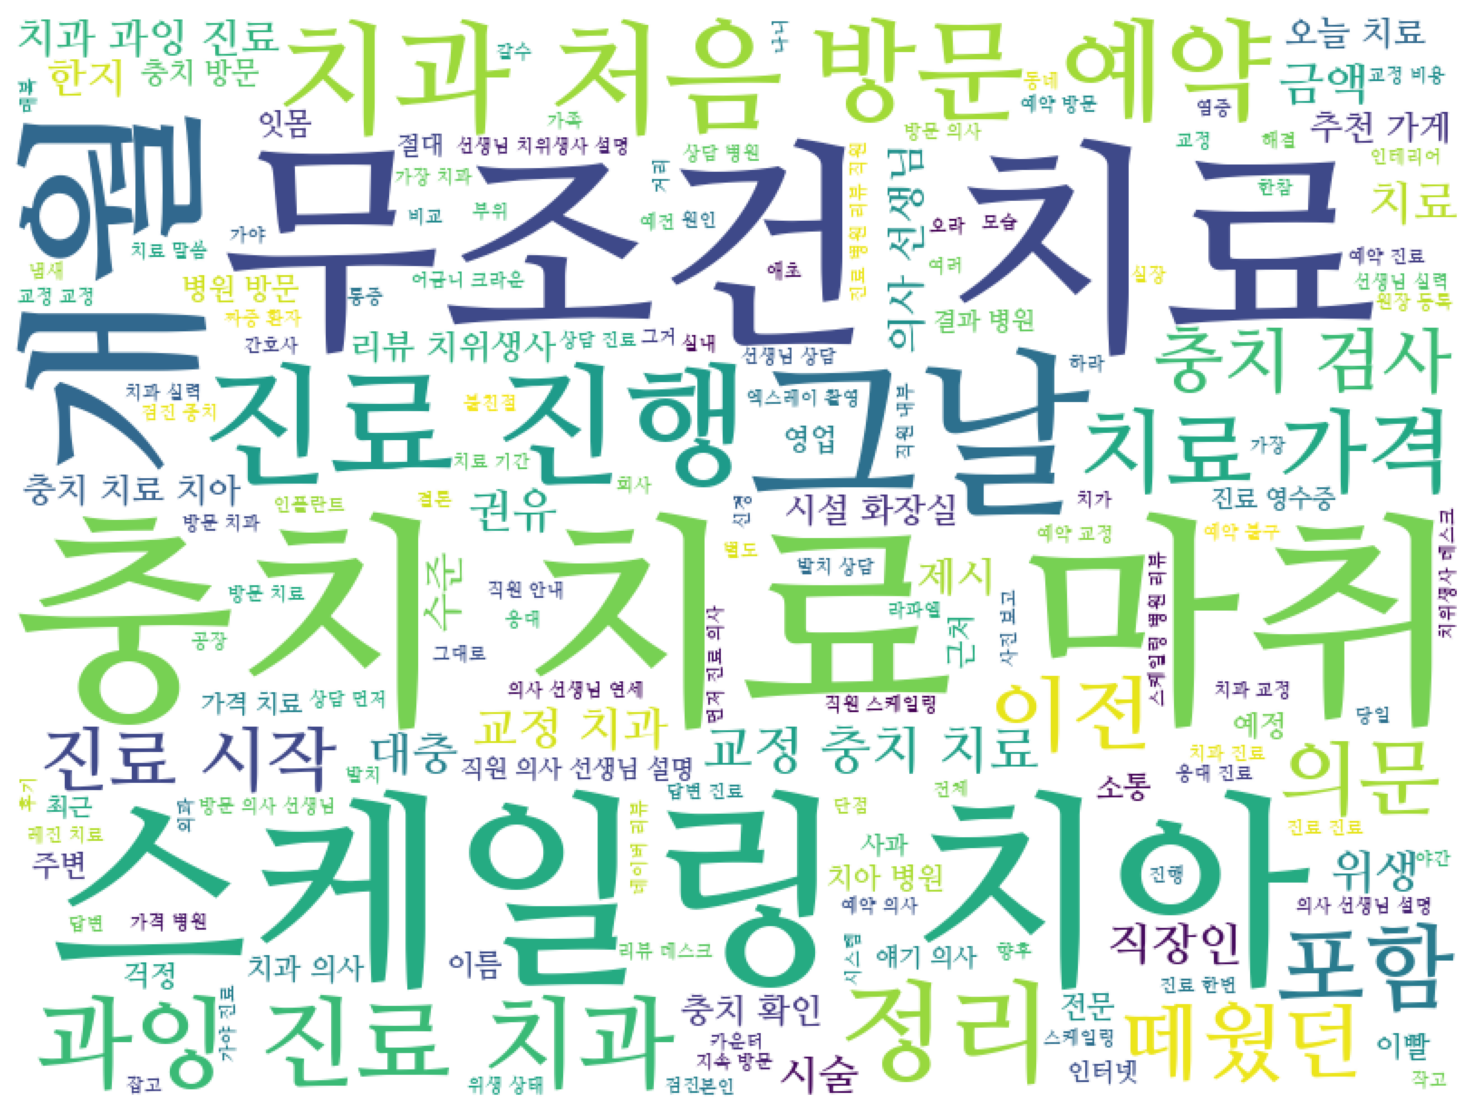

In [267]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


# mystopwords = set(STOPWORDS)
# mystopwords.add('치료')
# mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = stopwords_kor,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')

plt.imshow(cloud)
plt.show()
# plt.savefig('seoul_less6.png')

In [218]:
for i in df['reviews']:
    if '혼잣말' in i:
        print('-', i)

- 한줄평: 오래 다녔지만 다시 가고싶지 않아요.솔직히 교정 하는 내내 환자들 예약이 겹쳐 있어서 계속 딜레이 되고 웨이팅해야 되는게 너무 불편했고 싫었지만 아무말 안하고 다녔습니다.그리고 저한테 교정중,전에 시술한 치아 보철 크기 줄여오라고 해서 줄여왔더니 교정 다 끝나고 나서 보니 그 공간 많이 비어서 전에 보철 줄인거 다시 제 돈으로 새로 보철을 맞춰야 되는 상황이구요.교정후 만족 하는것도 아닙니다.다른곳에 비해 가격이 저렴한것도 아니구요.유지장치 철사 한개 끊어졌는데 의사분이 해주시는것도 아니였고 위생사분이 해주셨는데 출근 시간이라 빨리 가야되는데 오래걸려서 늦었구요.받는 내내 너무 불편했어요 원래 해주시던분이 해주신것도 아니였고요.그런데 의사를 만난 시간이 5분도 안되는 시간 보고 가셔놓고 결제 금액은 8만원이나 나왔습니다.철사를 제거한것도 아니고 끊긴 철사는 냅두고 그위에 작은철사 그냥 붙인거예요.주변 치과 다니시는분이나 다른지인분들한테 이야기 하면 다 너무 한거 아니냐고 그럽니다.심지어 제가 여기서 신경치로도 했었는데 치료 받는 내내 그때도 의사분이 치료중 혼잣말 하시면서 신경관 좁다고 잘 안되는데..이런식으로 말씀 하셔서 받는 내내 불안했고,신경 치료후 경과도 제대로 보지 않고 보철을 씌웠고 받고 나서도 계속 너무 아팠고 바빠서 치과를 못가는동안 1년 내내 아팠습니다.치료가 완전히 되지 않은 상황에서 보철을 씌워서 안에서 염증이 심해졌고 다시 갔을때 사과는 없으셨고 다시 제돈으로 대학병원 가서 신경치료 받아오면 보철은 해주겠다고 이야기 했습니다. 그래서 여기서 보철 하기 싫다고 해서 보철 값만 환불 받고 다른곳에서 신경치료 했고 교정을 여기서 한터라 유지장치 때문에 다시 방문해야돼서 여기와서 신경치료 보철 값을 다시 내고 받았습니다. 다시 보철 받을때는 교정 끝난지 2,3년 됐을때였고 보철 씌우는겸 교정 진료도 같이 예약하고 방문 했던겁니다. 그런데 교정 진료에서 저런 상황이 생겨서 다시는 방문 하고싶은 마음 전혀 없고요. 주변 사람들한테 소개해